In [1]:
library(lme4)

Loading required package: Matrix



In [2]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



In [3]:
dat = read_csv("aut_semdis_input_w_dists.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  id = col_double(),
  item = col_character(),
  response = col_character(),
  response_id = col_double(),
  object = col_character(),
  respondent_id = col_character(),
  temperature = col_double(),
  eucl_item_resp = col_double(),
  eucl_objc_resp = col_double(),
  cos_dist_item_resp = col_double(),
  cos_dist_objc_resp = col_double()
)




In [5]:
options(repr.matrix.max.rows=12)
dat

X1,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.658492,8.365611,0.8548300,0.8470857
1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.871257,6.382291,0.6830550,0.6391920
2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,4.980463,6.307006,0.2979423,0.6505155
3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.695191,8.987339,0.8309639,0.9399682
4,5,chair,make art such as by decoupaging it onto a canvas or,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.324841,5.784203,0.5988328,0.5408867
5,6,chair,door stop,2022040006,book,cmpl-4zrXMnec5vnPs9Rno0qAGOwJ1vslr,0.67,6.845305,7.156677,0.6174432,0.7348902
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1637,1638,chair,wallpaper,20167315,tin can,BP20160002,NA,8.981015,7.447930,0.8242082,0.7441342
1638,1639,chair,rolls,20167316,tin can,BP20160002,NA,8.034032,6.342345,0.7654500,0.6734991


In [7]:
dat2 = dat %>% mutate(human = grepl("BP2016",respondent_id))
dat2

X1,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp,human
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.658492,8.365611,0.8548300,0.8470857,FALSE
1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.871257,6.382291,0.6830550,0.6391920,FALSE
2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,4.980463,6.307006,0.2979423,0.6505155,FALSE
3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.695191,8.987339,0.8309639,0.9399682,FALSE
4,5,chair,make art such as by decoupaging it onto a canvas or,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,6.324841,5.784203,0.5988328,0.5408867,FALSE
5,6,chair,door stop,2022040006,book,cmpl-4zrXMnec5vnPs9Rno0qAGOwJ1vslr,0.67,6.845305,7.156677,0.6174432,0.7348902,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1637,1638,chair,wallpaper,20167315,tin can,BP20160002,NA,8.981015,7.447930,0.8242082,0.7441342,TRUE
1638,1639,chair,rolls,20167316,tin can,BP20160002,NA,8.034032,6.342345,0.7654500,0.6734991,TRUE


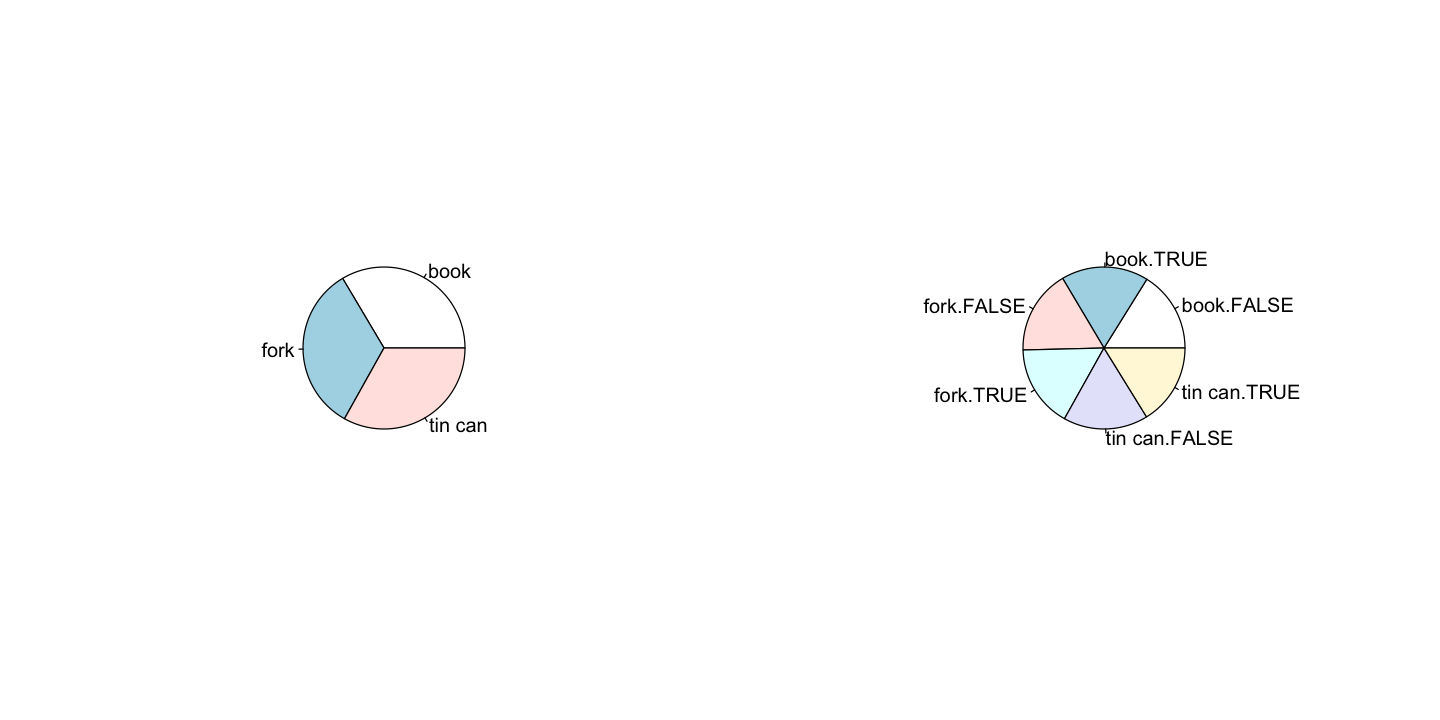

In [201]:
options(repr.plot.width=12, repr.plot.height=6,par=c(1,1,1,1))
layout(t(1:2))
{
    dat2 %>% count(object) %>% with(pie(n,labels = object))
    dat2 %>% count(object, human) %>% with(pie(n, labels = interaction(object, human)))
}

## Multilevel Analysis

In [203]:
lmefit = lmer(cos_dist_objc_resp ~ human * object + (1|respondent_id), data = dat2)
car::S(lmefit)
car::Anova(lmefit)

Linear mixed model fit by REML 
Call: lmer(formula = cos_dist_objc_resp ~ human * object + (1 | respondent_id),
           data = dat2)

Estimates of Fixed Effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.66319    0.01446  45.858  < 2e-16 ***
humanTRUE                0.02726    0.02106   1.295 0.195492    
objectfork              -0.07831    0.02042  -3.836 0.000125 ***
objecttin can           -0.23635    0.02051 -11.524  < 2e-16 ***
humanTRUE:objectfork     0.11382    0.02307   4.934 8.04e-07 ***
humanTRUE:objecttin can  0.09925    0.02308   4.301 1.70e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Estimates of Random Effects (Covariance Components):
 Groups        Name        Std.Dev.
 respondent_id (Intercept) 0.08531 
 Residual                  0.12249 

Number of obs: 1643, groups:  respondent_id, 186

  logLik       df      AIC      BIC 
  959.62        8 -1903.23 -1860.00 

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
human,36.36359,1,1.637338e-09
object,392.33988,2,6.374967e-86
human:object,28.93873,2,5.200364e-07


The Anova table (the last table) for this model indicates that

- There's a large significant effect of whether the response human generated or AI generated
- There are large significant differences between the mean semantic distances of the different objects
- The differences between human and AI generated responses vary (highly) significantly across objects.

The table of coefficients shows in which directions these effects go:

- Human generated responses tend to have higher semantic distances to the object than AI generated responses
- Compared to responses to 'fork', whether human or AI generated, are closer to the semantic meaning of 'fork' than
  responses to 'book' are to the semantic meaning of 'book' (z=-3.8, p < .0001). Responses to 'tin can' are even
  closer to the semantic meaning of tin can than responses to 'book' are to book (z=-11.5, p < .0001).
- However, human generated responses to 'fork' tend to lie further from the semantic meaning of 'fork' than
  AI generated responses (z = 4.9, p < .0001), and the same is true for responses to 'tin can' (z = 4.3, p < .0001).

## Check with conventional repeated measures ANOVA

The $z$-statistics and corresponding $p$ values are only approximate in the multilevel model. Just to check if the conclusions uphold in a more conventional repeated measures ANOVA, we perform this analysis here.

In [139]:
fit <- aov(cos_dist_objc_resp ~ object*human + Error(respondent_id), data = dat2)
car::S(fit)


Error: respondent_id
              Df Sum Sq Mean Sq F value   Pr(>F)    
object         2  7.119   3.559  51.817  < 2e-16 ***
human          1  2.623   2.623  38.184 4.19e-09 ***
object:human   2  0.439   0.219   3.192   0.0434 *  
Residuals    180 12.364   0.069                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
            Df Sum Sq Mean Sq F value Pr(>F)    
object       2   4.14   2.070   138.1 <2e-16 ***
Residuals 1455  21.82   0.015                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Result

After controling for `respondent_id` (participant—human or otherwise),

- `object` levels have significantly different mean cosine distances between object and response vectors
- there's a significant difference between human response producers and artificial response producers
- there appears to be a significant interaction between the object to which the response was made 
  and whether the respondent was human or not

A visualization of the existing differences shows that, while the mean semantic distance scores difference between human and AI does not appear to be significant for `object` = "book", the same differences are quite substantial for `object` = "fork" and `object` = "tin can". 
The mean semantic distances are larger for human generated responses than for AI generated responses.

`summarise()` has grouped output by 'object'. You can override using the `.groups` argument.



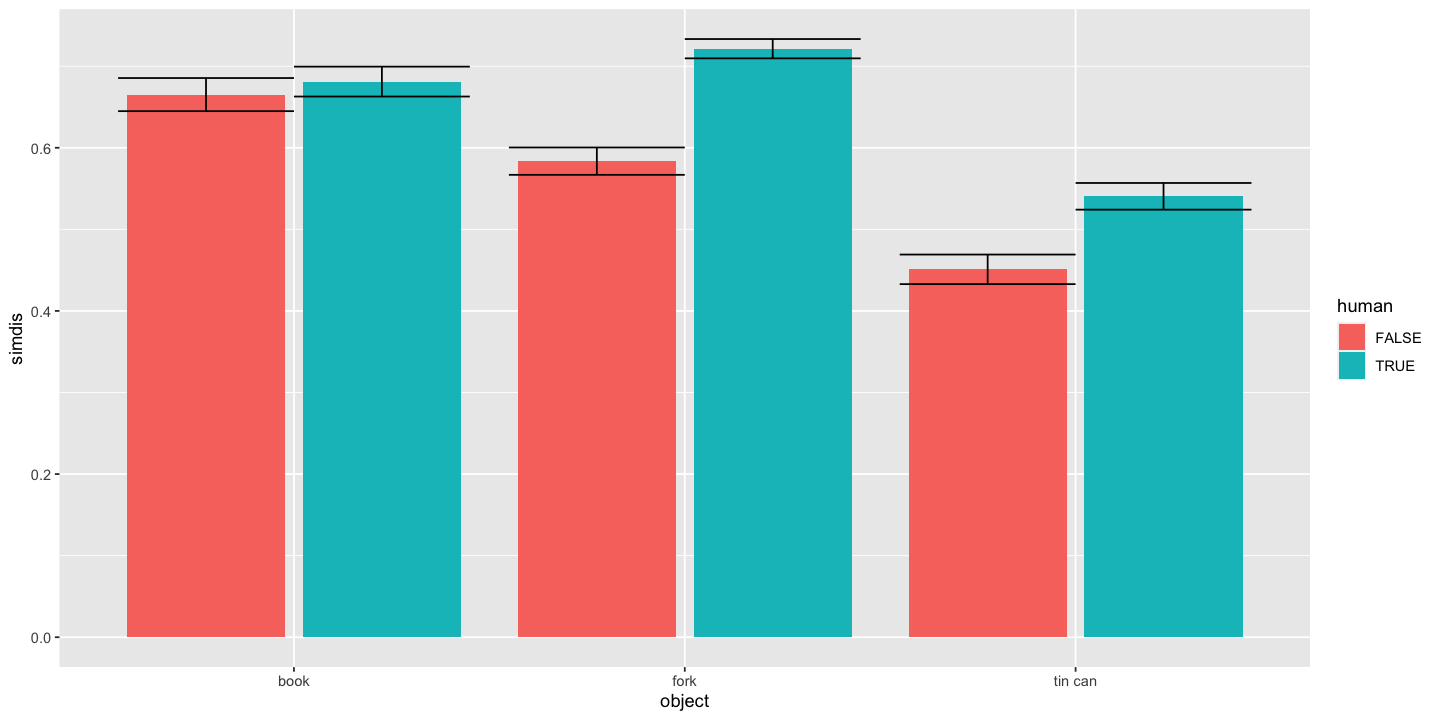

In [205]:
dat2 %>% group_by(object,human) %>% 
    summarise(simdis = mean(cos_dist_objc_resp), se=sd(cos_dist_objc_resp)/n()^0.5) %>% 
    ggplot(aes(object, simdis, fill=human)) + geom_bar(stat = "identity", position = "dodge2") +
    geom_errorbar(aes(ymin= simdis-1.96*se, ymax=simdis+1.96*se), position=PositionDodge)

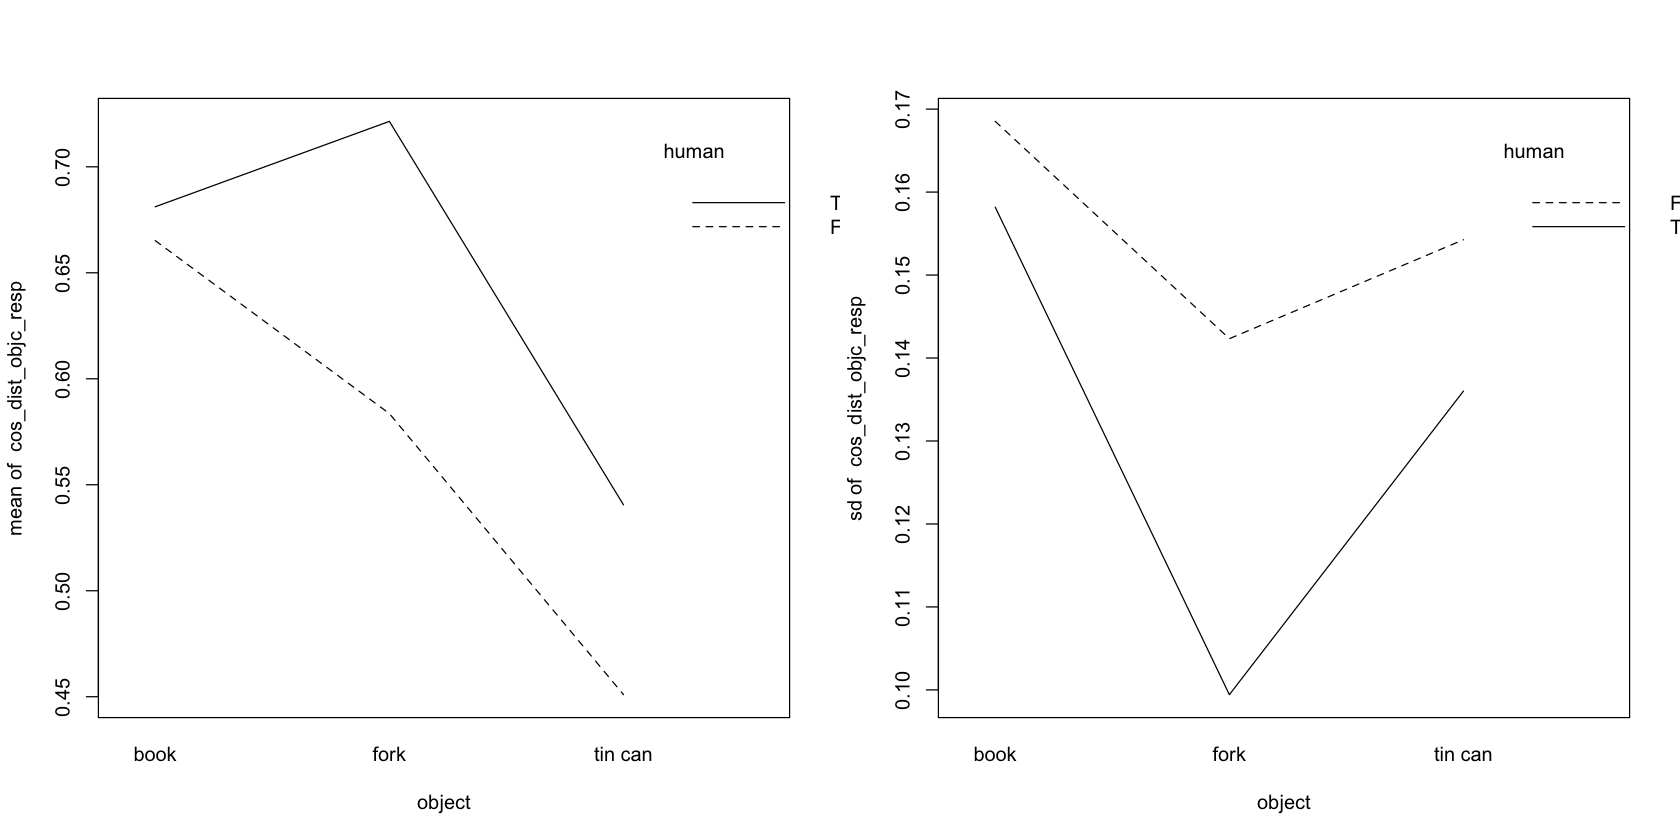

In [71]:
options(repr.plot.width=14, repr.plot.height=7)
layout(t(1:2))
with(dat2, interaction.plot(object, trace.factor = human, response = cos_dist_objc_resp, fun = mean))
with(dat2, interaction.plot(object, trace.factor = human, response = cos_dist_objc_resp, fun = sd))

### Diagnostics

To see if the assumptions for ANOVA hold we look at plots. A simple box and whisker plot reveals no gross violations of homogeneity of cell variances:

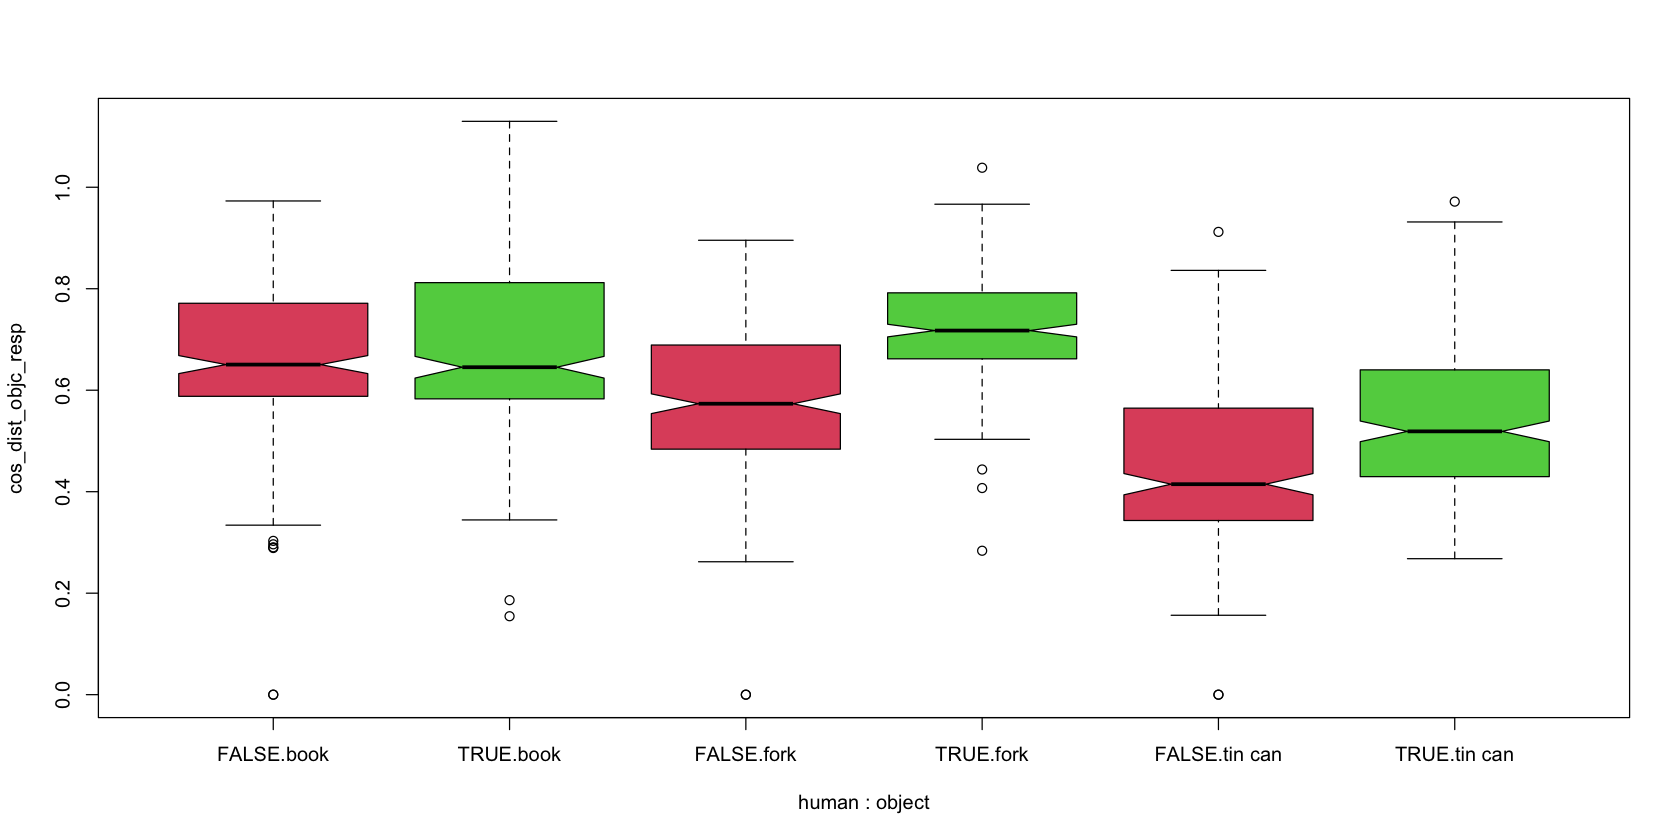

In [141]:
boxplot(cos_dist_objc_resp ~ human*object, data=dat2,  col=2:3, notch=T)
#dat2 %>% ggplot(aes(cos_dist_objc_resp, fill=interaction(human,object))) + geom_density(alpha=0.3) # not so interesting

Levene's test below indicates that variances are different, which would be a violation of the assumption of homogeneity of variances. We must take into consideration however that a) the observations are not independent (something that cannot be handled by Levene's test), plus b) this may also indicate non-normal error distributions. Furthermore, the amount of data is so large that the central limit most likely kicks in, rendering the analysis of variance output is probably still valid.

In [195]:
car::leveneTest(aov(cos_dist_objc_resp ~ object*human, data = dat2))

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,12.53643,5.761108e-12
,1637,NA,NA


## Subanalysis of AI generated responses

It is of interest to see if the AI generated responses vary with `temperature`. We should expect this, because the higher the temperature parameter in GPT-3 the more random (non-repeatable) the responses are—or rather, _should be_.

Because `temperature` and `respondent_id` are collinear, we first average the semantic distance within `respondent_id` and then run a plain regression.

Remarkably, the regression slope is actually _negative_; it is not clear whether this is a temperature specification issue, or that something very unexpected is going on.

Call: lm(formula = cos_dist_objc_resp ~ temperature, data = tmp)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.83055    0.07652  10.855  < 2e-16 ***
temperature -0.36694    0.10551  -3.478 0.000532 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard deviation: 0.1407 on 818 degrees of freedom
Multiple R-squared: 0.01457
F-statistic: 12.09 on 1 and 818 DF,  p-value: 0.0005325 
    AIC     BIC 
-885.16 -871.03 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



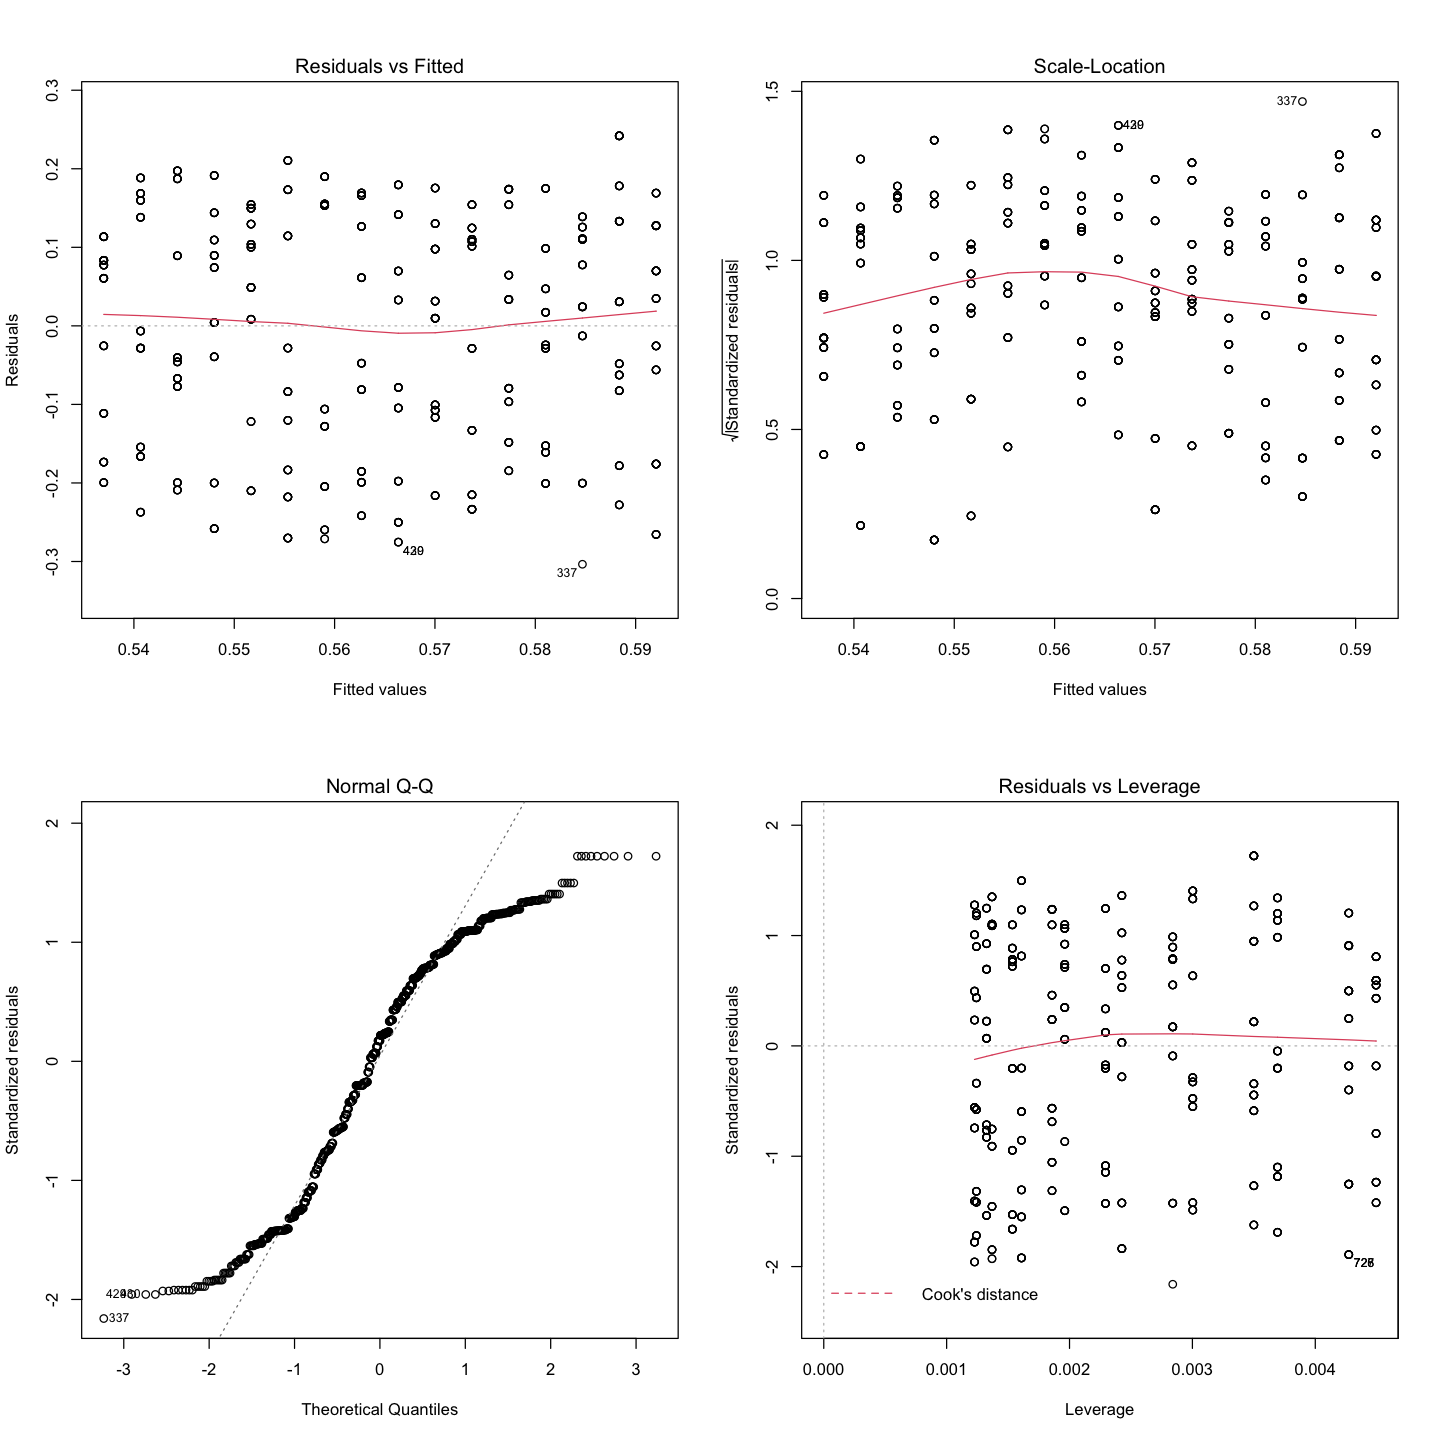

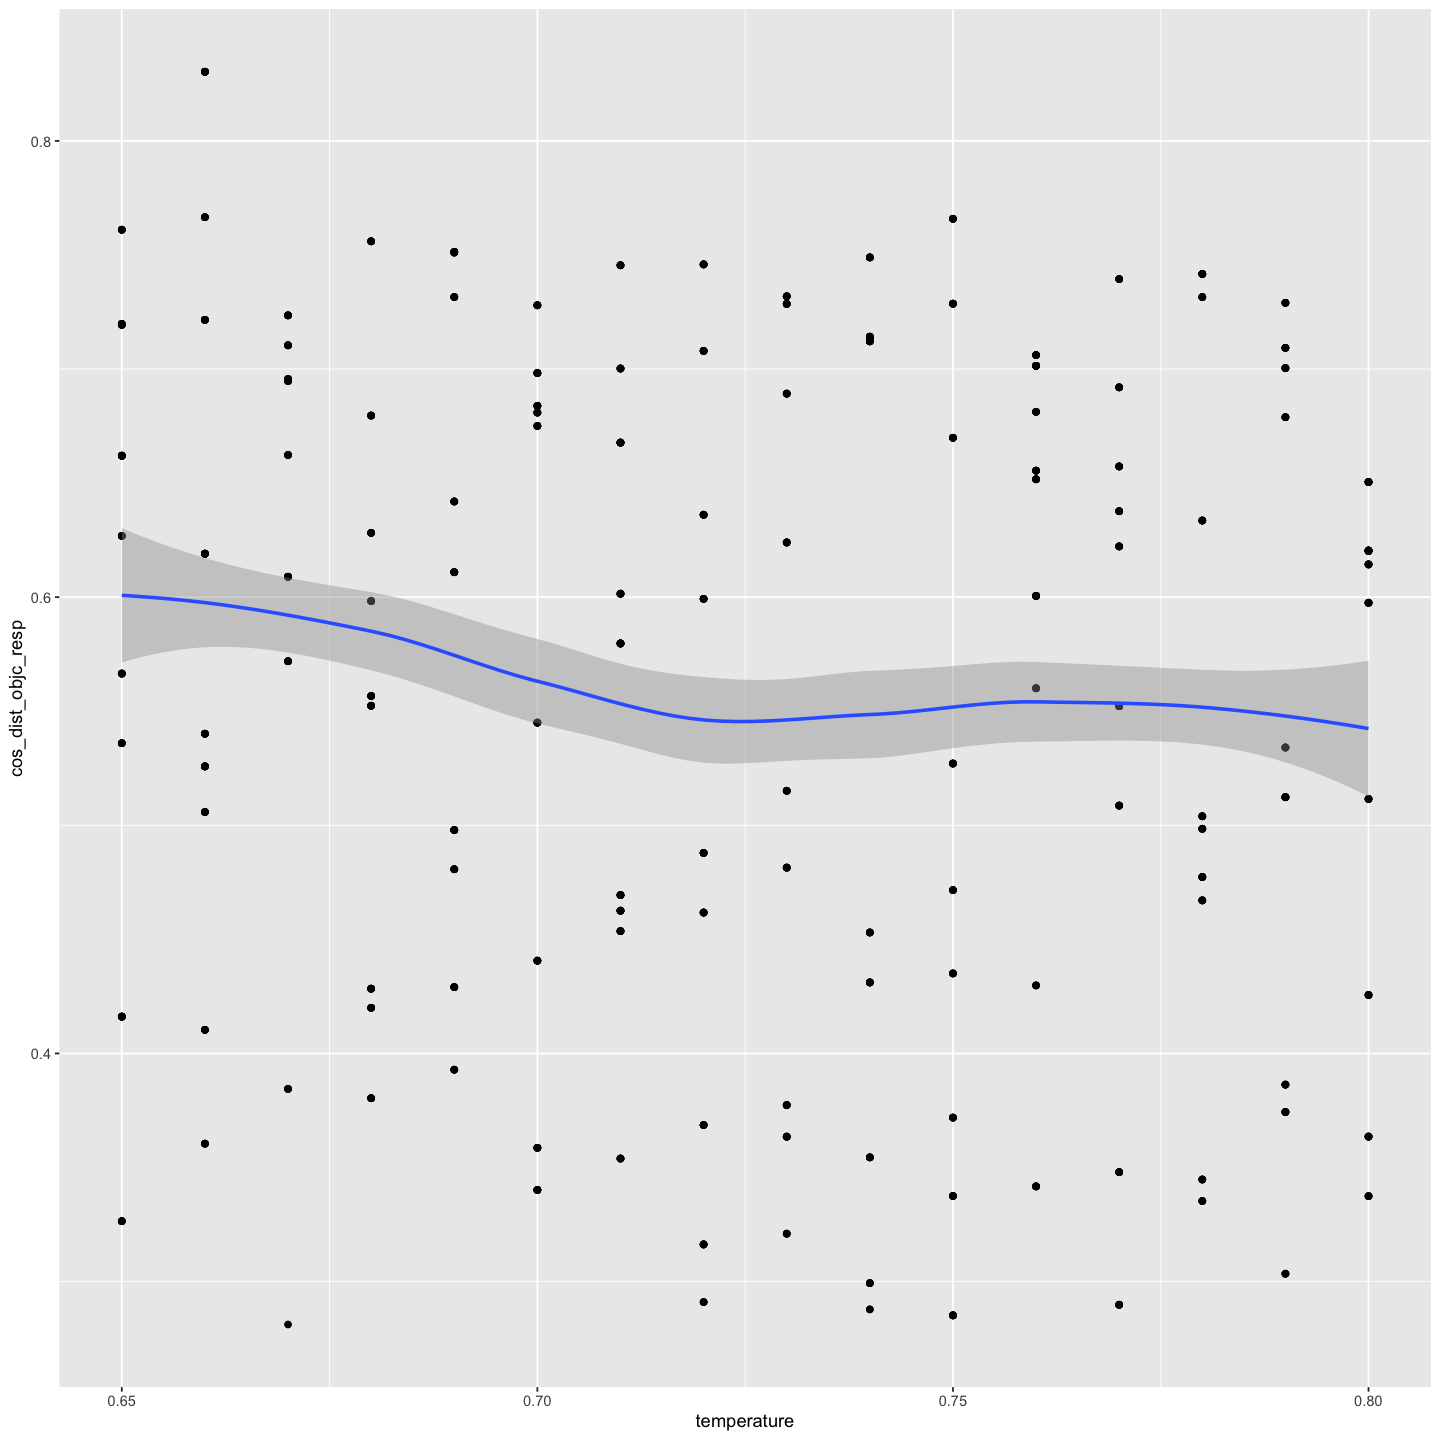

In [217]:
tmp = dat2 %>% filter(!human) %>% group_by(respondent_id) %>% mutate(cos_dist_objc_resp= mean(cos_dist_objc_resp))
fit_lm_temp = lm(cos_dist_objc_resp ~ temperature, data=tmp)
car::S(fit_lm_temp)

options(repr.plot.width=12, repr.plot.height=12)
layout(matrix(1:4,2))
plot(fit_lm_temp)
layout(1)
tmp %>% ggplot(aes(temperature, cos_dist_objc_resp)) + geom_point() + geom_smooth()